In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


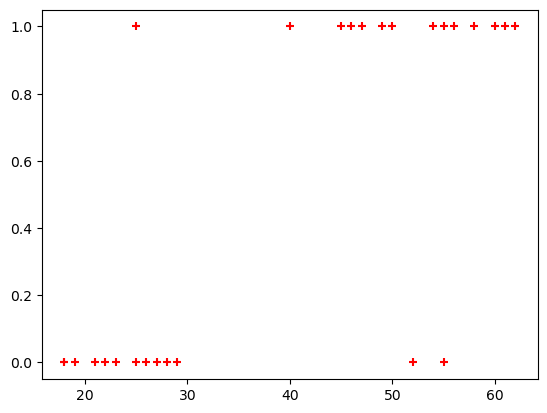

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [5]:
X_test


,age
16,25
18,19
3,52
26,23
22,40
25,54


In [6]:
y_test

16    1
18    0
3     0
26    0
22    1
25    1
Name: bought_insurance, dtype: int64

In [7]:
X_train

,age
12,27
17,58
23,45
10,18
21,26
15,55
13,29
19,18
1,25
14,49


In [8]:
y_train

12    0
17    1
23    1
10    0
21    0
15    1
13    0
19    0
1     0
14    1
20    0
24    1
9     1
2     1
7     1
4     1
8     1
0     0
11    0
6     0
5     1
Name: bought_insurance, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
X_test


,age
16,25
18,19
3,52
26,23
22,40
25,54


In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.predict_proba(X_test)

array([[0.96732053, 0.03267947],
       [0.99053353, 0.00946647],
       [0.09158858, 0.90841142],
       [0.97830383, 0.02169617],
       [0.55749943, 0.44250057],
       [0.06207699, 0.93792301]])

In [14]:
model.score(X_test,y_test)

0.5

In [15]:
y_predicted

array([0, 0, 1, 0, 0, 1], dtype=int64)

In [16]:
X_test

,age
16,25
18,19
3,52
26,23
22,40
25,54


In [17]:
model.coef_

array([[0.21045087]])

In [18]:
model.intercept_

array([-8.6490546])

In [19]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [21]:
age = 35
prediction_function(age)

0.4850044983805899

In [22]:
age = 43
prediction_function(age)

0.568565299077705

In [3]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

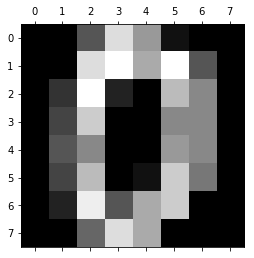

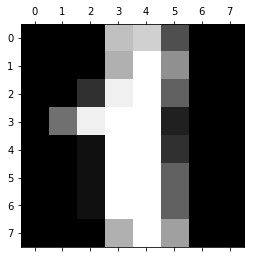

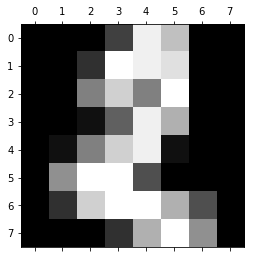

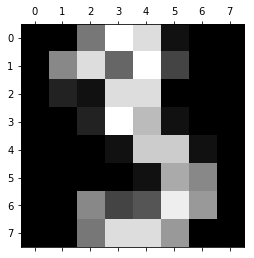

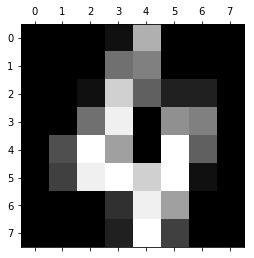

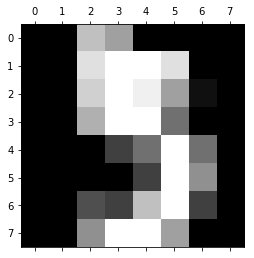

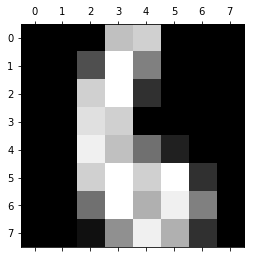

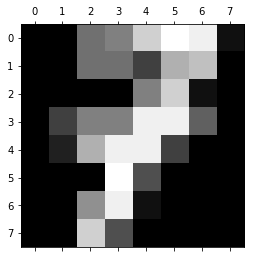

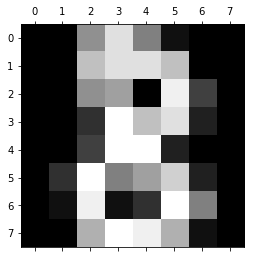

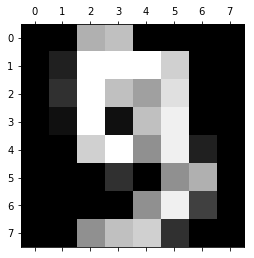

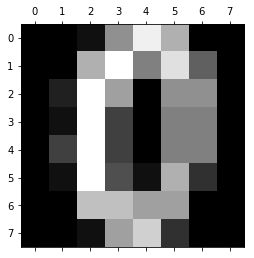

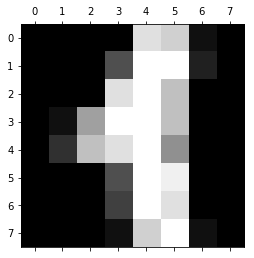

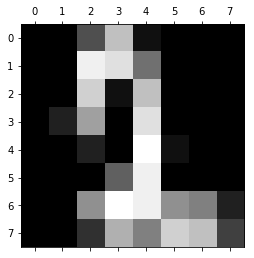

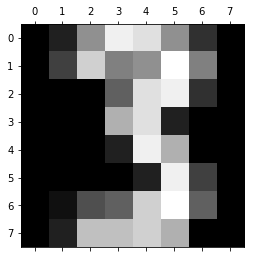

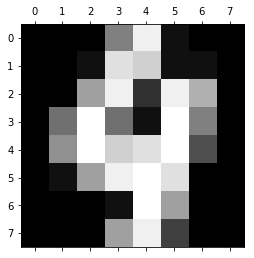

In [4]:
plt.gray() 
for i in range(15):
    plt.matshow(digits.images[i]) 

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [9]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
model.score(X_test, y_test)

0.9527777777777777

In [11]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [12]:
y_predicted = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 29,  2,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

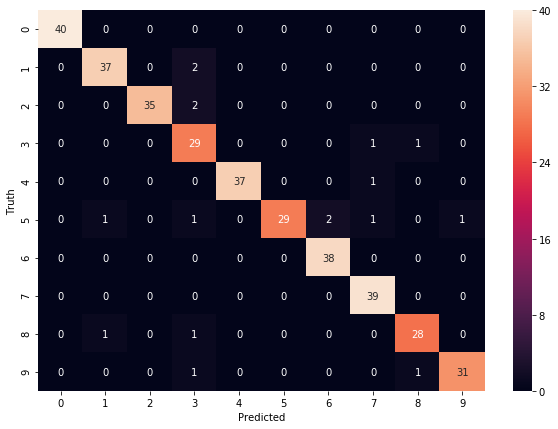

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')